## Assignment 3

~ Aminder Kaur

### Introduction

Apprentice Chef,Inc is a San Francisco based company that was developed for the busy professionals that can have wide variety of home-cooked gourmet meals with less than 30 minutes cooking time and disposable cookware. 


For them to diversify their revenue system they have started a promotion by the name of Halfway, which sends half a bottle of wine from a local California vineyard to the customers.

### Insights On Revenue

The data that was presented by the Data Science team at the Apprentice Inc is used for the analysis . For the company to increase the revenue they should focus on the rating of the food as with 1 unit increase in rating leads to a 993 unit increase in its revenue .

### Insight on Promotion

From the analysis it can be said that people who have large name or whose length of full name is greater should be more focused group for this promotion .
 People who have subscribed to the apprentice chef with the email that seem to be  junk are more likely to subscribe to this promotion so they should be a focused  group . 


### R Square

For the Lasso model you can get a R 2 of 0.835 with less than 0.05 train test gap.

### AUC Score

For  GBM l you can get AUC  of 0.8424 with this we can predict for 84% more precisely which customer is going to use this service .

### Conclusion

The apprentice chef is a growing company with a good marketing strategy. If they continue to focus on the people with a busy lifestyle and good quality of food, they may be able to grow even further. With all thses analysis as done we can predict what all factors can lead to increase in revenue and success of the Promotion .

### Script

In [2]:
import random            as rand                     # random number gen
import pandas            as pd # data science essentials
import numpy as np
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler # standard scaler
from six import StringIO# saves objects in memory
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus# interprets dot objects
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler



file = "Apprentice_Chef_Dataset.xlsx"
df = pd.read_excel(io=file)
df.head(n=5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,...,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,...,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,...,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,...,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,...,0,8,0,0,84.8,1,1,3,12,205


In [4]:
#for checking any null values in the dataset 
df.isnull().sum(axis=0)

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

#### Feature Engineering

In [9]:
#for plotting the important features 
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [5]:
# for the missing values of the data in family name 
fill = "Unknown"
df['FAMILY_NAME'] = df['FAMILY_NAME'].fillna(fill)

In [6]:
# STEP 1: splitting personal emails

# placeholder list
email_lst = []

# looping over each email address
for index, col in df.iterrows():
    
    # splitting email domain at '@'
    split_email = df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    email_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(email_lst)


# displaying the results
email_df

,0,1
0,saathos,unitedhealth.com
1,alysanne.osgrey,ge.org
2,edwyd.fossoway,jnj.com
3,eleyna.westerling,ge.org
4,elyn.norridge,jnj.com
...,...,...
1941,obara.sand,yahoo.com
1942,quentyn.blackwood,yahoo.com
1943,rhonda.rowan,gmail.com
1944,turnip,yahoo.com


In [7]:
# renaming column to concatenate
email_df.columns = ['0', 'email_domain']


# concatenating personal_email_domain with df
df = pd.concat([df, email_df['email_domain']],
                   axis = 1)

In [8]:
# email domain types as given in the case study 
personal_email = ['@gmail.com', '@yahoo.com','@protonmail.com']
junk_email  = ['@me.com','@aol.com','@hotmail.com','@live.com','@msn.com','@passport.com']
prof_email =['@mmm.com','@amex.com','@apple.com','@boeing.com','@caterpillar.com','@chevron.com','@cisco.com',
              '@cocacola.com','@disney.com','@dupont.com','@exxon.com','@ge.org','@goldmansacs.com','@homedepot.com',
              '@ibm.com','@intel.com','@jnj.com','@jpmorgan.com','@mcdonalds.com','@merck.com','@microsoft.com',
              '@nike.com','@pfizer.com','@pg.com','@travelers.com','@unitedtech.com','@unitedhealth.com',
              '@verizon.com','@visa.com','@walmart.com']

# placeholder list
email_lst = []


# looping to group observations by domain type
for domain in df['email_domain']:
    
    if '@' + domain in personal_email:
        email_lst.append('personal')
        

    elif '@' + domain in junk_email:
        email_lst.append('junk')
        
    elif '@' + domain in prof_email:
        email_lst.append('professional')


    else:
            print('Unknown')


# concatenating with original DataFrame
df['domain_group'] = pd.Series(email_lst)


# checking results
df['domain_group'].value_counts()

personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

In [10]:
# email domain types as given in the case study 
personal_email = ['@gmail.com', '@yahoo.com','@protonmail.com']
junk_email  = ['@me.com','@aol.com','@hotmail.com','@live.com','@msn.com','@passport.com']
prof_email =['@mmm.com','@amex.com','@apple.com','@boeing.com','@caterpillar.com','@chevron.com','@cisco.com',
              '@cocacola.com','@disney.com','@dupont.com','@exxon.com','@ge.org','@goldmansacs.com','@homedepot.com',
              '@ibm.com','@intel.com','@jnj.com','@jpmorgan.com','@mcdonalds.com','@merck.com','@microsoft.com',
              '@nike.com','@pfizer.com','@pg.com','@travelers.com','@unitedtech.com','@unitedhealth.com',
              '@verizon.com','@visa.com','@walmart.com']

# placeholder list
email_lst = []


# looping to group observations by domain type
for domain in df['email_domain']:
    
    if '@' + domain in personal_email:
        email_lst.append('personal')
        

    elif '@' + domain in junk_email:
        email_lst.append('junk')
        
    elif '@' + domain in prof_email:
        email_lst.append('professional')


    else:
            print('Unknown')


# concatenating with original DataFrame
df['domain_group'] = pd.Series(email_lst)


# checking results
df['domain_group'].value_counts()

personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

In [11]:
#for counting the number of words in the name of the person 
name_len =[]
for names in df['NAME']:
    name_len.append(len(names))
df['name_len'] = pd.Series(name_len)  

In [12]:
#doing one hot encoding on the domain group 
hot_email_domain      = pd.get_dummies(df['domain_group'])
df = df.drop('domain_group', axis = 1)
df = pd.concat([df,hot_email_domain],axis=1)

In [14]:
### outlier threshold
# setting threshold
tmeals_thres = 190.00
umeals_thres = 13
contwcust_thres =12
avgtime_thres = 200
cancelbnoon_thres = 5
weekplan_thres = 31
earlydel_thres = 7
latedel_thres = 8
avgprep_thres = 260
largord_thres = 8
mastercl_thress = 2
medrate_thres = 4

avgclck_thres = 18
totpic_thres = 410
reve_thres = 4500

df['out_tmeals'] = 0

# looping over one column  to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'TOTAL_MEALS_ORDERED'] > tmeals_thres: 
        # changing outlier flag
        df.loc[ index , 'out_tmeals'] = 1
        



########################
df['out_umeals'] = 0

# looping over one column  to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'UNIQUE_MEALS_PURCH'] > umeals_thres: 
        # changing outlier flag
        df.loc[ index , 'out_umeals'] = 1
        



######################
df['out_contwcust'] = 0

# looping over one column  to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'CONTACTS_W_CUSTOMER_SERVICE'] > contwcust_thres: 
        # changing outlier flag
        df.loc[ index , 'out_contwcust'] = 1
        




##############
df['out_avgtime'] = 0

# looping over one column to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'AVG_TIME_PER_SITE_VISIT'] > avgtime_thres: 
        # changing outlier flag
        df.loc[ index , 'out_avgtime'] = 1
        



####################
df['out_cancelbnoon'] = 0

# looping over one column  to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'CANCELLATIONS_BEFORE_NOON'] > cancelbnoon_thres: 
        # changing outlier flag
        df.loc[ index , 'out_cancelbnoon'] = 1
        



#####################
df['out_weekplan'] = 0

# looping over one column  to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'WEEKLY_PLAN'] > weekplan_thres: 
        # changing outlier flag
        df.loc[ index , 'out_weekplan'] = 1
        




########################
df['out_earlydel'] = 0

# looping over one column  to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'EARLY_DELIVERIES'] > earlydel_thres: 
        # changing outlier flag
        df.loc[ index , 'out_earlydel'] = 1
        




###################
df['out_latedel'] = 0

# looping over one column  to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'LATE_DELIVERIES'] > latedel_thres: 
        # changing outlier flag
        df.loc[ index , 'out_latedel'] = 1
        




####################
df['out_avgprep'] = 0

# looping over one column  to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'AVG_PREP_VID_TIME'] > avgprep_thres: 
        # changing outlier flag
        df.loc[ index , 'out_avgprep'] = 1
        




#######################
df['out_largord'] = 0

# looping over one column  to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'LARGEST_ORDER_SIZE'] > largord_thres: 
        # changing outlier flag
        df.loc[ index , 'out_largord'] = 1
        




#####################
df['out_mastercl'] = 0

# looping over one column  to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'MASTER_CLASSES_ATTENDED'] > mastercl_thress: 
        # changing outlier flag
        df.loc[ index , 'out_mastercl'] = 1
        




########################
df['out_medrate'] = 0

# looping over one column to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'MEDIAN_MEAL_RATING'] > medrate_thres: 
        # changing outlier flag
        df.loc[ index , 'out_medrate'] = 1
        



########################
df['out_avgclck'] = 0

# looping over one column to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'AVG_CLICKS_PER_VISIT'] > avgclck_thres : 
        # changing outlier flag
        df.loc[ index , 'out_avgclck'] = 1
        




##############
df['out_totpic'] = 0

# looping over one column to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'TOTAL_PHOTOS_VIEWED'] > totpic_thres: 
        # changing outlier flag
        df.loc[ index , 'out_totpic'] = 1
        

################
df['out_revenue'] = 0

# looping over one column  to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'REVENUE'] > reve_thres: 
        # changing outlier flag
        df.loc[ index , 'out_revenue'] = 1





In [15]:
#those variables that were skewed are transformed
df['log_REVENUE'] = np.log10(df['REVENUE'])
df['n_MEDIAN_MEAL_RATING'] = np.log10(df['MEDIAN_MEAL_RATING'])
df['n_LARGEST_ORDER_SIZE'] = np.log10(df['LARGEST_ORDER_SIZE'])
df['n_CONTACTS_W_CUSTOMER_SERVICEl'] = np.log10(df['CONTACTS_W_CUSTOMER_SERVICE'])
df['n_UNIQUE_MEALS_PURCH'] = np.log10(df['UNIQUE_MEALS_PURCH'])

In [16]:
df['Total_locker'] = df['PACKAGE_LOCKER'] + df['REFRIGERATED_LOCKER']

In [17]:
df['avgprepfor_uniquemeal'] = df['AVG_PREP_VID_TIME'] + df['UNIQUE_MEALS_PURCH']

In [18]:
df['rev_per_meal'] = df['REVENUE'] / df['TOTAL_MEALS_ORDERED']


In [19]:
#finding the correlation between all the variables with reapect to cross sell success 
df_corr = df.corr(method='pearson').round(decimals=2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS                1.00
professional                      0.19
name_len                          0.18
CANCELLATIONS_BEFORE_NOON         0.16
MOBILE_NUMBER                     0.10
TASTES_AND_PREFERENCES            0.08
REFRIGERATED_LOCKER               0.07
Total_locker                      0.06
out_cancelbnoon                   0.06
out_avgprep                       0.05
n_CONTACTS_W_CUSTOMER_SERVICEl    0.05
personal                          0.04
CONTACTS_W_CUSTOMER_SERVICE       0.04
MASTER_CLASSES_ATTENDED           0.04
PACKAGE_LOCKER                    0.04
PC_LOGINS                         0.04
AVG_PREP_VID_TIME                 0.03
out_medrate                       0.03
n_LARGEST_ORDER_SIZE              0.03
MEDIAN_MEAL_RATING                0.03
n_MEDIAN_MEAL_RATING              0.03
avgprepfor_uniquemeal             0.03
out_latedel                       0.02
out_earlydel                      0.02
LARGEST_ORDER_SIZE                0.02
EARLY_DELIVERIES         

#### Regression model - Revenue

In [20]:
# preparing explanatory variable data
x_data   = df.drop(['REVENUE',
                    'log_REVENUE','FIRST_NAME','FAMILY_NAME','NAME','EMAIL','email_domain'],
                               axis = 1)


# preparing response variables
df_target = df.loc[ : ,'REVENUE']
log_target = df.loc[ : ,'log_REVENUE']


# preparing training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(
            x_data,
            df_target,
            test_size = 0.25,
            random_state = 219)


In [24]:
import sklearn.linear_model
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 0.07,
                                         normalize = False) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train, y_train)

# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train, y_train).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test, y_test).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train, y_train).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test, y_test).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score.round(4))

Lasso Training Score : 0.8436
Lasso Testing Score  : 0.835
Lasso Train-Test Gap : 0.0086


/Users/aminderpalkaur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76631042.84370351, tolerance: 183693.4685355445
  model = cd_fast.enet_coordinate_descent(


In [25]:
# zipping each feature name to its coefficient
lasso_model_values = zip(x_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', -2219.65)
('CROSS_SELL_SUCCESS', -70.95)
('TOTAL_MEALS_ORDERED', 11.62)
('UNIQUE_MEALS_PURCH', 76.82)
('CONTACTS_W_CUSTOMER_SERVICE', -288.26)
('PRODUCT_CATEGORIES_VIEWED', 3.29)
('AVG_TIME_PER_SITE_VISIT', 0.03)
('MOBILE_NUMBER', -2.94)
('CANCELLATIONS_BEFORE_NOON', 10.5)
('CANCELLATIONS_AFTER_NOON', 20.33)
('TASTES_AND_PREFERENCES', 4.12)
('PC_LOGINS', -40.9)
('MOBILE_LOGINS', -25.57)
('WEEKLY_PLAN', 0.13)
('EARLY_DELIVERIES', 6.09)
('LATE_DELIVERIES', 2.99)
('PACKAGE_LOCKER', -16.32)
('REFRIGERATED_LOCKER', 3.54)
('AVG_PREP_VID_TIME', 9.78)
('LARGEST_ORDER_SIZE', -86.48)
('MASTER_CLASSES_ATTENDED', 124.42)
('MEDIAN_MEAL_RATING', 993.14)
('AVG_CLICKS_PER_VISIT', 5.65)
('TOTAL_PHOTOS_VIEWED', 0.46)
('name_len', 4.38)
('junk', -17.68)
('personal', 12.8)
('professional', 0.0)
('out_tmeals', -746.52)
('out_umeals', -2392.55)
('out_contwcust', 933.81)
('out_avgtime', -77.72)
('out_cancelbnoon', 14.66)
('out_weekplan', 44.45)
('out_earlydel', -108.43)
('out_latedel', 73.25)
(

#### Classification model - cross sell success


In [1]:
#cresting dictionaries of all columns so as to put in train test data 
candidate_dict = {

 
    # significant variables only (set 3)
 'logit_sig_3'  : ['REVENUE',   'TOTAL_MEALS_ORDERED',
       'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
       'AVG_TIME_PER_SITE_VISIT',  'CANCELLATIONS_BEFORE_NOON',
       'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS',
       'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
        'AVG_PREP_VID_TIME',
       'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
       'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'junk',
       'personal', 'professional', 'out_tmeals', 'out_umeals', 'out_contwcust',
       'out_avgtime', 'out_weekplan', 'out_earlydel',
       'out_avgprep', 'out_largord', 'out_mastercl',
       'out_medrate', 'out_avgclck', 'out_totpic', 'out_revenue',
       'log_REVENUE', 'n_MEDIAN_MEAL_RATING', 'n_LARGEST_ORDER_SIZE',
       'n_CONTACTS_W_CUSTOMER_SERVICEl', 'n_UNIQUE_MEALS_PURCH',
       'Total_locker', 'avgprepfor_uniquemeal', 'rev_per_meal','name_len'],
   
    # significant variables only (set 4)
 'logit_sig_4'    : ['REVENUE',  'TOTAL_MEALS_ORDERED', 
       'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
       'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
       'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS',
       'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
        'AVG_PREP_VID_TIME',
       'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
       'AVG_CLICKS_PER_VISIT',  
       'personal', 'professional', 'out_tmeals', 'out_umeals', 'out_contwcust',
       'out_avgtime', 'out_cancelbnoon', 'out_weekplan', 'out_earlydel',
       'out_latedel', 'out_avgprep', 'out_largord', 'out_mastercl',
       'out_medrate', 'out_avgclck', 'out_totpic', 'out_revenue',
       'log_REVENUE', 'n_MEDIAN_MEAL_RATING', 'n_LARGEST_ORDER_SIZE',
       'n_CONTACTS_W_CUSTOMER_SERVICEl', 'n_UNIQUE_MEALS_PURCH',
       'Total_locker', 'avgprepfor_uniquemeal', 'rev_per_meal','name_len'],
    
    
}

In [27]:
# train/test split with the logit_sig variables
log_data   =  df.loc[:,candidate_dict['logit_sig_3']]
log_target =  df.loc[:,'CROSS_SELL_SUCCESS']


# train/test split
X_train, X_test, y_train, y_test = train_test_split(
            log_data,
            log_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = log_target)

In [28]:
#hyperparameter tining gbm
gbm_tuned = GradientBoostingClassifier(learning_rate=0.30000000000000004, max_depth=2,
                           n_estimators=175)# unpacking the confusion matrix


# FIT step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(log_data, log_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))
                                       
tuned_gbm_train =gbm_tuned_fit.score(X_train, y_train).round(4)
tuned_gbm_test = gbm_tuned_fit.score(X_test, y_test).round(4)
tuned_gbm_auc =roc_auc_score(y_true  = y_test,y_score = gbm_tuned_pred).round(4)

Training ACCURACY: 0.8821
Testing  ACCURACY: 0.8871
AUC Score        : 0.8424


In [29]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 112
False Positives: 44
False Negatives: 11
True Positives : 320



<ipython-input-9-8c77b9046977>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


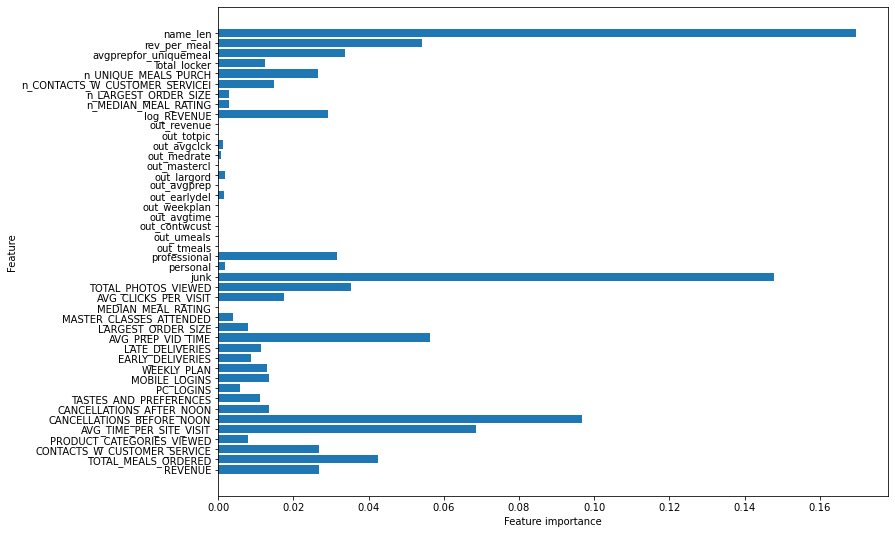

In [30]:
plot_feature_importances(gbm_tuned_fit,
                         train = X_train,
                         export = False)